# Advection reaction problem
## Upwind method

In [1]:
import sympy as sym
import scipy.sparse as sp
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown, Latex, clear_output
from time import sleep

In [2]:
class upwind_method:
    
    def __init__(self, alpha, u_0, g, a = 0, b = 1, T = 1):
        self.a = a
        self.b = b
        self.T = T
        self.alpha = alpha
        self.u_0 = u_0
        self.g = g
        
    def courant_number(self, tau, h):
        return abs(self.alpha) * tau / h
        
    def compute_solution(self, tau, h):
        
        eta = self.courant_number(tau, h)
        if eta > 1:
            print("The method is unstable!")
            
        N_t = (int) (self.T / tau)
        N_x = (int) ((self.b - self.a) / h)
        U = np.zeros((N_t,N_x))
        coeffs = [eta * np.ones(N_x-1), (1 - eta) * np.ones(N_x)]
        A = sp.diags(coeffs,[-1,0], format="csr")
        u_0 = np.vectorize(self.u_0)
        g = np.vectorize(self.g)
        x = np.linspace(self.a,self.b,N_x)
        t = np.linspace(0,self.T,N_t)
        
        U[0,:] = u_0(x)
        bc = 0 if self.alpha > 0 else N_x - 1
        U[:,bc] = g(t)
        for i in range(1,N_t):
            U[i,:] = A.dot(U[i-1,:])
        
        return U

In [3]:
def u_0(x):
    return 10**4*(0.1 - x)**2*(0.2-x)**2 if 0.1 < x and x < 0.2 else 0.0
g = lambda x : 0

In [8]:
def plot_PDE(t,x,sol,wait=0.005):
    _min = sol.min()
    _max = sol.max()
    
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    step = len(t) // 200
    for i in range(0,len(t),step):
        ax.cla()
        ax.title.set_text("Time: " + str(round(t[i],3)) + " s")
    
       
        ax.plot(x, sol[i])

        ax.set_xlim(0, 1)
        ax.set_ylim(_min, _max)
        display(fig)
    
        clear_output(wait = True)
        sleep(wait)

In [17]:
N_t = 250
N_x = 120

h = 1/N_x
tau = 1/N_t

um = upwind_method(2,u_0,g)
U = um.compute_solution(tau,h)
x = np.linspace(0,1,N_x)
t = np.linspace(0,1,N_t)
print(um.courant_number(tau,h))

0.9600000000000001


KeyboardInterrupt: 

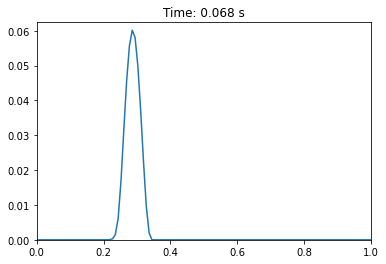

In [19]:
plot_PDE(t,x,U)